Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.07413506507873535
MSE:  3.676409577618094
Коэффициенты:  [6.07713834 0.85190878 1.98641378 2.95501986 3.98822447 5.02792289]


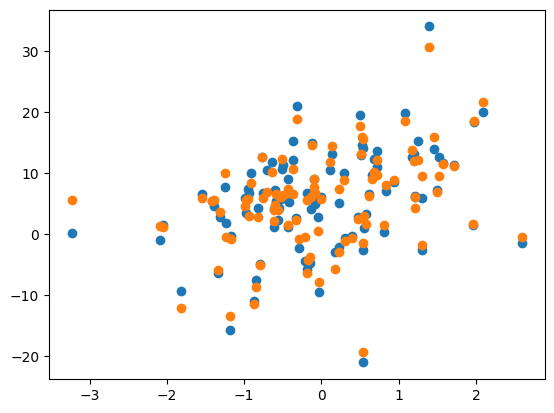

In [3]:
X = np.random.randn(100, 5)
y = X @ np.array([1, 2, 3, 4, 5]) + np.random.randn(100) * 2 + 6

start_time = time.time()
modelGD = LinearRegressionGD(lr=0.01, max_iter=400, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelGD.predict(X)
print("MSE: ", modelGD.MSE(X, y))
print("Коэффициенты: ", modelGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

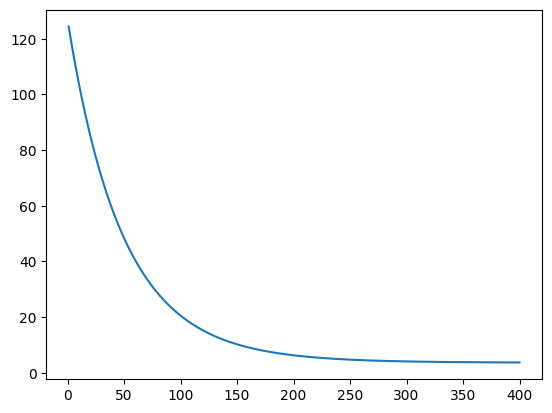

In [4]:
fig = plt.plot(steps, errors)

In [5]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # размер мини-батча
        self.batch_size = batch_size
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.03336620330810547
MSE:  3.591673346143945
Коэффициенты:  [6.22639292 0.92393791 2.09092854 3.05465536 4.1670164  5.0544348 ]


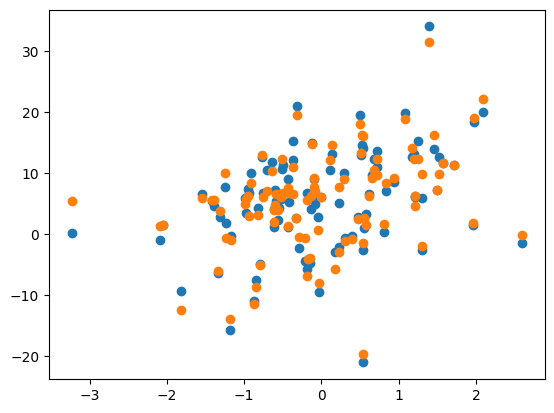

In [6]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.01, max_iter=50, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelSGD.predict(X)
print("MSE: ", np.mean((y_pred - y) ** 2))
print("Коэффициенты: ", modelSGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

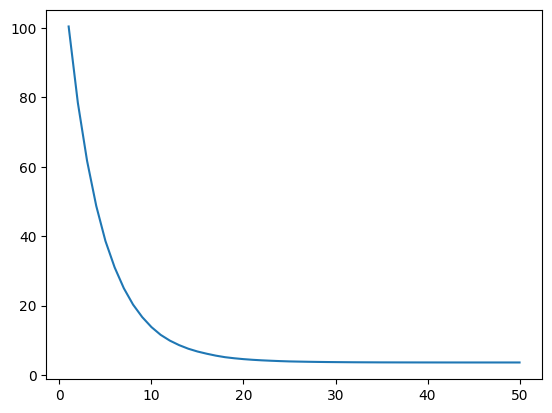

In [7]:
fig = plt.plot(steps, errors)

In [8]:
def train_test_split_(x, y, test_size=0.2, random_state=None):
    data = np.concatenate((x, y.reshape(y.shape[0],1)), axis=1)
    # Задаем seed для воспроизводимости результатов, если указан random_state
    if random_state is not None:
        np.random.seed(random_state)

    # Вычисляем количество элементов для тестовой выборки
    num_test = int(len(data) * test_size)

    # Случайно перемешиваем индексы
    shuffled_indices = np.random.permutation(len(data))

    # Выбираем индексы для тестовой выборки
    test_indices = shuffled_indices[:num_test]

    # Выбираем индексы для обучающей выборки
    train_indices = shuffled_indices[num_test:]

    # Разделяем данные на обучающую и тестовую выборки
    train_data = data[train_indices]
    test_data = data[test_indices]

    return train_data[:,:-1], train_data[:,-1], test_data[:,:-1], test_data[:,-1]

In [9]:
from sklearn import datasets
import pandas as pd
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

# Создание нового столбца, содержащего целевую переменную 'y'
# (количественный показатель прогрессирования заболевания
# через год после исходного уровня)
df['diabetes_measure'] = diabetes.target
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(df.head())
x_train, y_train, x_test, y_test = train_test_split_(X, y, test_size = 0.3, random_state = 123)
x_train1 = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test1 = np.hstack((np.ones((x_test.shape[0], 1)), x_test))


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes_measure  
0 -0.002592  0.019907 -0.017646             151.0  
1 -0.039493 -0.068332 -0.092204              75.0  
2 -0.002592  0.002861 -0.025930             141.0  
3  0.034309  0.022688 -0.009362             206.0  
4 -0.002592 -0.031988 -0.046641             135.0  


Реализуем L2-регуляризацию с помощью прямых вычислений:
\begin{align}w &= (X^TX + \lambda I_d)^{-1}X^Ty\end{align}

l, MSE_test - MSE_train:
1e-20 99.62520656137531
2.5353644939701167e-20 99.62520656137531
6.428073117284345e-20 99.62520656137531
1.6297508346206402e-19 99.62520656137531
4.1320124001153346e-19 99.62520656137531
1.0476157527896661e-18 99.62520656137531
2.6560877829466947e-18 99.62520656137531
6.734150657750801e-18 99.62520656137531
1.7073526474706886e-17 99.62520656137531
4.328761281083062e-17 99.62520656137531
1.097498765493059e-16 99.62520656137485
2.782559402207126e-16 99.62520656137985
7.054802310718631e-16 99.62520656137713
1.788649529057435e-15 99.62520656137667
4.534878508128591e-15 99.62520656137576
1.1497569953977357e-14 99.62520656137576
2.9150530628251696e-14 99.62520656136849
7.390722033525775e-14 99.62520656135894
1.8738174228603867e-13 99.62520656133256
4.750810162102794e-13 99.6252065612639
1.2045035402587836e-12 99.62520656109564
3.0538555088334124e-12 99.62520656066226
7.742636826811278e-12 99.62520655956223
1.9630406500402685e-11 99.6252065567819
4.977023564332114e-11

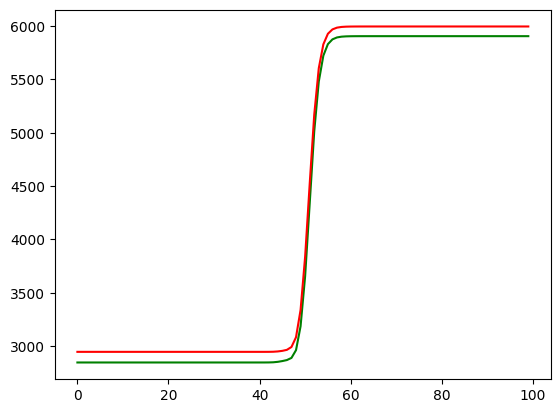

In [10]:
train_scores, test_scores = [], []
id = np.eye(x_train.shape[1]+1)
id[0][0] = 0
print("l, MSE_test - MSE_train:")
for l in np.logspace(-20, 20, 100):
    w = np.linalg.inv(x_train1.T @ x_train1 + l*id) @ x_train1.T @ y_train
    MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
    train_scores.append(MSE_train)
    MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
    test_scores.append(MSE_test)
    print(l, MSE_test - MSE_train)
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')

start_time = time.time()
w = np.linalg.inv(x_train1.T @ x_train1 + 0.038*id) @ x_train1.T @ y_train
MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
print("Время обучения:", time.time() - start_time)
print("MSE_train, MSE_test", MSE_train, MSE_test)
print("Коэффициенты: ", w)
print("np.linalg.det(x_train.T @ x_train): ", np.linalg.det(x_train1.T @ x_train1))
print("np.linalg.det(x_train.T @ x_train + 0.43287*id): ", np.linalg.det(x_train1.T @ x_train1 + 0.43287*id))

Время обучения: 0.6178197860717773
MSE_train:  3060.3749576883124
MSE_test:  3187.0956124244867
Коэффициенты:  [ 152.69076152   42.39985986  -97.23634027  374.87515265  217.48366499
   -7.98664919  -39.07988943 -191.9602773   161.10082192  284.13524376
  158.81117188]


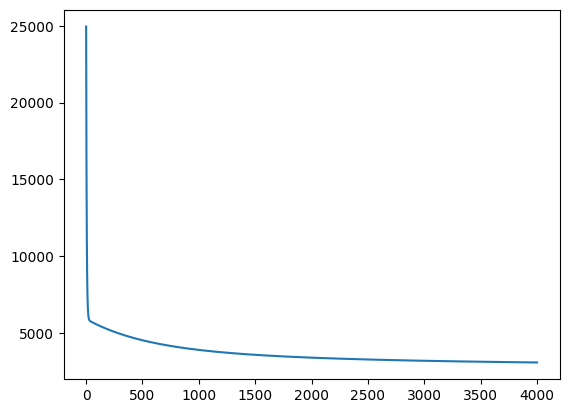

In [11]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelGD.theta)
plt.plot(steps, errors)

Время обучения: 0.43713879585266113
MSE_train:  2874.4625442680485
MSE_test:  2959.6134711331865
Коэффициенты:  [ 151.5491199    13.4797293  -242.17776999  533.74946446  266.9014214
  -74.58966891 -117.80983904 -206.82247501  169.24586581  390.33279364
  120.62468385]


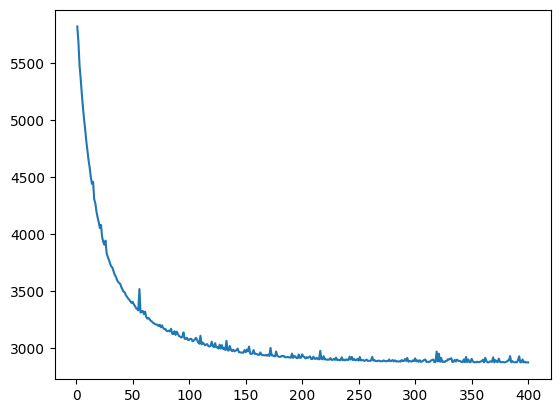

In [12]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 19.32884693145752
MSE_train:  2849.01077999237
MSE_test:  2952.885736059851
Коэффициенты:  [ 154.02469695    9.47128162 -261.28918569  540.27139365  275.24277731
 -810.919927    441.85906458  135.59908348  294.83540483  669.61255537
  101.81578562]


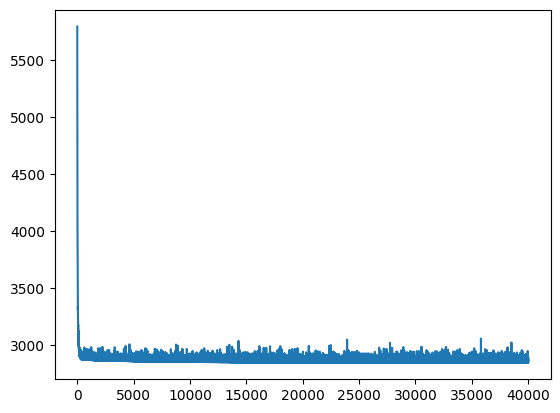

In [13]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 8.691431522369385
MSE_train:  2852.2669089085066
MSE_test:  2948.138277741099
Коэффициенты:  [ 151.66734708   12.01036411 -259.01464652  545.45094896  272.58958392
 -501.5664655   193.26467017    3.31623893  262.40277703  553.35872218
  102.0380112 ]


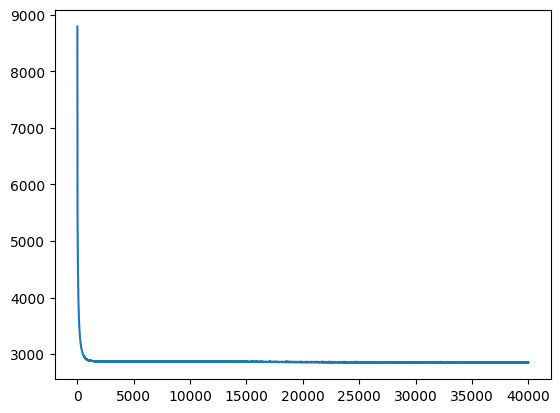

In [14]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Видим, что у стохастического градиентного спуска качество выше, разрыв в качестве на обучающей и тестовой выборке меньше, время выполнения меньше, и чем у обычного градиентного спуска, и чем у прямых вычислений с L2-регуляризацией! При этом стохастический градиентный спуск работает более "шумно". Многое зависит и от оптимального подбора размера мини-батча.



<b>Домашнее задание</b>

Объясните, почему коэффициенты всех построенных моделей сильно отличаются между собой.

При использовании градиентного спуска вычисляется градиент по всем обучающим значениям.
При использовании стохастического градиентного спуска вычисляется градиент, который усредняется для каждого батча. Поэтому результаты выглядят "нестабильными".
Вследствии различия подходов выявляется сильно различие между коэффициентами моделей

Сравните скорость и качество обучения моделей регрессии с помощью обычного и стохастического градиентного спуска на наборе данных housing.csv.

In [22]:
df = pd.read_csv('./housing.csv')
df.head()
df.to_numpy().astype("float64")

data = df.copy()
Y = np.array(data['Y'])
x = np.array(data.drop('Y', axis=1))
x_train, y_train, x_test, y_test = train_test_split_(x, Y, 0.2, 123)

In [24]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=40000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения LinearRegressionGD:", time.time() - start_time)
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))

start_time = time.time()
modelSGD1 = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=4, tol=1e-3, intercept = True)
steps, errors = modelSGD1.fit(x_train, y_train)
print("Время обучения LinearRegressionSGD1, batch_size = 4:", time.time() - start_time)
print("MSE_train: ", modelSGD1.MSE(x_train, y_train))
print("MSE_test: ", modelSGD1.MSE(x_test, y_test))

start_time = time.time()
modelSGD3 = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=128, tol=1e-3, intercept = True)
steps, errors = modelSGD3.fit(x_train, y_train)
print("Время обучения LinearRegressionSGD3, batch_size = 128:", time.time() - start_time)
print("MSE_train: ", modelSGD3.MSE(x_train, y_train))
print("MSE_test: ", modelSGD3.MSE(x_test, y_test))

Время обучения LinearRegressionGD: 12.951858043670654
MSE_train:  6.987835071534166
MSE_test:  18.52205011640132
Время обучения LinearRegressionSGD1, batch_size = 4: 5.956925392150879
MSE_train:  12.374398711118484
MSE_test:  27.232826807918894
Время обучения LinearRegressionSGD3, batch_size = 128: 10.987149715423584
MSE_train:  6.404434403471079
MSE_test:  19.4701026223613


Подберите в цикле оптимальное, с Вашей точки зрения, значение размера мини-батча и поясните Ваш выбор.

In [28]:
from tqdm import tqdm
errors_array_train, errors_array_test, batch_size_arr = [], [], []
for batch_size in tqdm(range(1, len(x_train), 20)):
   modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=batch_size, tol=1e-3, intercept = True)
   steps, errors = modelSGD.fit(x_train, y_train)
   errors_array_train.append(modelSGD.MSE(x_train, y_train))
   errors_array_test.append(modelSGD.MSE(x_test, y_test))
   batch_size_arr.append(batch_size)

100%|██████████| 21/21 [07:26<00:00, 21.26s/it]


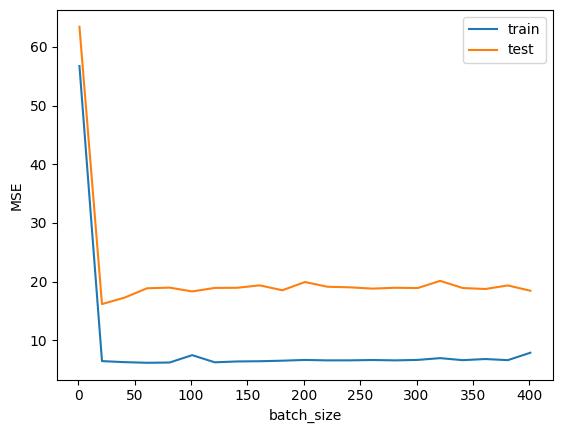

In [29]:
plt.plot(batch_size_arr, errors_array_train, label='train')
plt.plot(batch_size_arr, errors_array_test, label='test')
plt.xlabel("batch_size")
plt.ylabel("MSE")
plt.legend()
plt.show()

Реализуйте в классе LinearRegressionSGD стохастический градиентный спуск с регуляризацией L1, L2, ElasticNet и подберите оптимальные параметры регуляризации, чтобы сократить разрыв качества на обучающей и тестовой выборке.

In [30]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        self.learning_rate = lr
        self.max_iteration = max_iter
        self.batch_size = batch_size
        self.tolerance_convergence  = tol
        self.intercept = intercept
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y, reg = "L1", lam = 0, rho = 0):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)

                grad, self.theta = np.expand_dims(grad, axis=1), np.expand_dims(self.theta, axis=1)
                if reg == "L1":
                    grad += lam*(np.sign(self.theta))
                elif reg == "L2":
                    grad += 2*lam*((self.theta))
                elif reg == "ElasticNet":
                    grad += rho*lam*(np.sign(self.theta)) + 2*(1-rho)*lam*((self.theta))

                grad, self.theta = grad.flatten(), self.theta.flatten()

                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

100%|██████████| 5/5 [01:23<00:00, 16.73s/it]


Для L1 регуляризации
Минимальное тренировочное значение это 6.325729769181664 при lam = 1e-05
Минимальное тестовое значение это 18.59256168928725 при lam = 1e-05


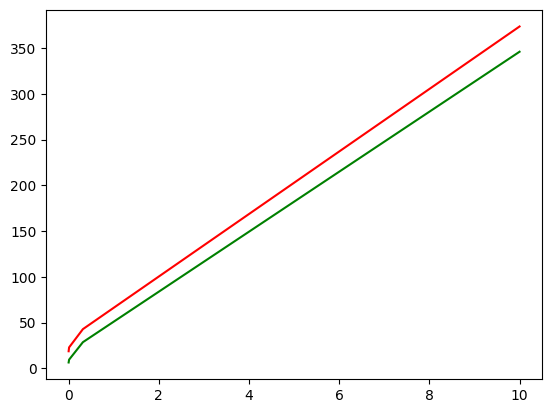

In [40]:
train_scores, test_scores = [], []
x_spatial = np.logspace(-5, 1, 5)
for l in tqdm(x_spatial):
    modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=128, tol=1e-3, intercept = True)
    steps, errors = modelSGD.fit(x_train, y_train, reg = "L1", lam = l)

    train_scores.append(modelSGD.MSE(x_train, y_train))
    test_scores.append(modelSGD.MSE(x_test, y_test))

plt.plot(x_spatial, train_scores, 'g')
plt.plot(x_spatial, test_scores, 'r')
print("Для L1 регуляризации")
print("Минимальное тренировочное значение это", np.min(train_scores), "при lam =", x_spatial[np.where(train_scores == np.min(np.array(train_scores)))[0][0]])
print("Минимальное тестовое значение это", np.min(test_scores), "при lam =", x_spatial[np.where(test_scores == np.min(np.array(test_scores)))[0][0]])

100%|██████████| 5/5 [01:45<00:00, 21.19s/it]


Для L2 регуляризации
Минимальное тренировочное значение это 6.535016995074715 при lam = 1e-05
Минимальное тестовое значение это 17.80315852834209 при lam = 0.00031622776601683794


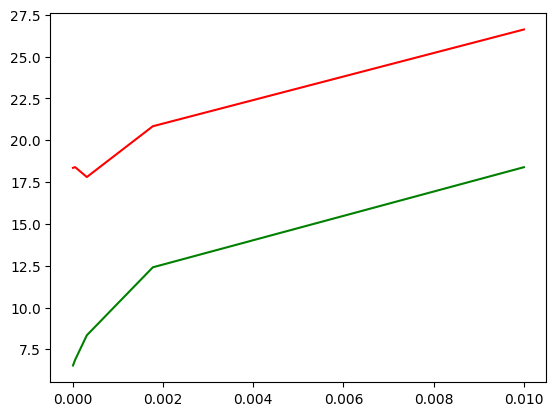

In [38]:
train_scores, test_scores = [], []
x_spatial = np.logspace(-5, -2, 5)
for l in tqdm(x_spatial):
    modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=128, tol=1e-3, intercept = True)
    steps, errors = modelSGD.fit(x_train, y_train, reg = "L2", lam = l)

    train_scores.append(modelSGD.MSE(x_train, y_train))
    test_scores.append(modelSGD.MSE(x_test, y_test))

plt.plot(x_spatial, train_scores, 'g')
plt.plot(x_spatial, test_scores, 'r')
print("Для L2 регуляризации")
print("Минимальное тренировочное значение это", np.min(train_scores), "при lam =", x_spatial[np.where(train_scores == np.min(np.array(train_scores)))[0][0]])
print("Минимальное тестовое значение это", np.min(test_scores), "при lam =", x_spatial[np.where(test_scores == np.min(np.array(test_scores)))[0][0]])

100%|██████████| 5/5 [01:33<00:00, 18.63s/it]


Для ElasticNet регуляризации
Минимальное тренировочное значение это 6.294575186027362 при lam = 1e-05
Минимальное тестовое значение это 18.036128717181146 при lam = 0.00031622776601683794


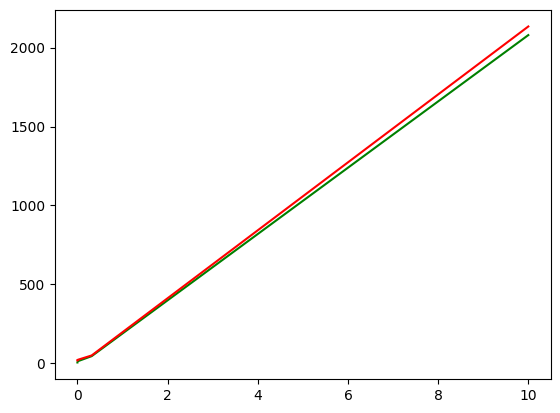

In [39]:
train_scores, test_scores = [], []
x_spatial = np.logspace(-5, 1, 5)
for l in tqdm(x_spatial):
    modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=128, tol=1e-3, intercept = True)
    steps, errors = modelSGD.fit(x_train, y_train, reg = "ElasticNet", lam = l, rho = 0.7)

    train_scores.append(modelSGD.MSE(x_train, y_train))
    test_scores.append(modelSGD.MSE(x_test, y_test))

plt.plot(x_spatial, train_scores, 'g')
plt.plot(x_spatial, test_scores, 'r')
print("Для ElasticNet регуляризации")
print("Минимальное тренировочное значение это", np.min(train_scores), "при lam =", x_spatial[np.where(train_scores == np.min(np.array(train_scores)))[0][0]])
print("Минимальное тестовое значение это", np.min(test_scores), "при lam =", x_spatial[np.where(test_scores == np.min(np.array(test_scores)))[0][0]])